# Modulo 2 Lucha de datos

___    
En Este [link] (https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/edX/ML0101EN/ML0101EN-Reg-NoneLinearRegression-py-v1.ipynb) se encuentra la relacionado con el Modulo 4 del curso ciencia de datos de edx 
___ 

## Tabla de contenidos
* Identificar y manejar valores perdidos
* Identificar valores perdidos
* Tratar con valores perdidos
* Formato de datos correcto
* Estandarización de datos
* Normalización de datos (centrado / escalado)
* Binning
* Variable indicadora

## Pero Cual es el proposito del Data Wrangling?
Data Wrangling es el proceso de convertir datos del formato inicial a un formato que puede ser mejor para el análisis.   

Responderemos la siguiente pregunta durante este modulo
### ¿Cuál es la tasa de consumo de combustible (L / 100k) para el automóvil diesel?
### Importar los datos





In [210]:
import pandas as pd 
import matplotlib.pylab as plt


### Creamos una variable que aloja la ruta del archivo con los datos que trataremos

In [211]:
filename = ('modulo2.csv')


Como vimos en el modulo1, para que la información sea mas clara, crearemos nuestros headers, son etiquetas para las columnas, esto ya que los datos originalmente no las traen

In [212]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

creamos un marco de datos o en ingles (un dataframe) y lo almacenamos en una varibla llamda `df`, para hacer esto utilizamos el metodo `read_csv()`

In [213]:
# a diferencia que en el modulo 1 esta es otra forma de incluir los heaer en el marco de datos
df = pd.read_csv(filename,names = headers) 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Como podemos ver, varios signos de interrogación aparecieron en el marco de datos; esos son valores faltantes que pueden dificultar nuestro análisis posterior. Entonces, ¿cómo identificamos todos esos valores perdidos y los tratamos?

### Como trabajar con los datos faltantes?

Pasos para trabajar con datos faltantes:

1. dentificar datos faltantes
2. tratar con datos faltantes
3. formato de datos correcto


# Identificar y manejar valores perdidos
### Identificar valores perdidos

#### Corvertit "?" a NaN
En el conjunto de datos del automóvil, los datos faltantes vienen con el signo de interrogación "?". Reemplazamos "?" con NaN (No es un número), que es el marcador de valor perdido predeterminado de Python, por razones de velocidad y conveniencia computacionales. Aquí usamos la función: `DataFrame.replace(A,B, inplace = True)` reemplazar A por B


In [214]:
import numpy as np 
# reemplazando "?" a NaN
df.replace("?", np.nan, inplace= True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


### Evaluando los datos perdidos
Los valores faltantes se convierten al valor predeterminado de Python. Utilizamos las funciones integradas de Python para identificar estos valores faltantes. Hay dos métodos para detectar datos faltantes:

1. `.isnull()`
2. `.notnull()`   

La salida es un valor booleano que indica si el valor que se pasa al argumento es de hecho datos faltantes.

In [215]:
missing_data = df.isnull()
missing_data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


"Verdadero" significa valor perdido, mientras que "Falso" significa valor no perdido.
#### contar los valores faltantes de cada columna
Usando un bucle For en Python, podemos calcular rápidaemte el número de valores faltantes en cada columna. Como se mencionó enteriormente, "verdadero" representa el valor faltante, "Falso" significa que el valor esta presente en el conjunto de datos. En el cuerpo del bucle for, el metodo `value_counts()` cuenta con el numero de valores "verdaderos"

In [216]:
for column in missing_data.columns.values.tolist():
    print (column)
    print (missing_data[column].value_counts())
    print("")


symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Según el resumen anterior, cada columna tiene 205 filas de datos, siete columnas que contienen datos faltantes:

1. "pérdidas normalizadas": 41 datos faltantes
2. "número de puertas": faltan 2 datos
3. "bore": 4 datos faltantes
4. "accidente cerebrovascular": 4 datos faltantes
5. "caballos de fuerza": 2 datos faltantes
6. "pico-rpm": faltan 2 datos
7. "precio": 4 datos faltantes

### Tratar con los datos Faltantes
**¿Cómo lidiar con los datos faltantes?**

1. Eliminar datos
    1. Eliminar toda la fila
    2. Eliminar toda la columna
2. reemplazar datos
    1. reemplazarlo por medio
    2. reemplazarlo por frecuencia
    3. reemplazarlo en función de otras funciones

Las columnas enteras solo deben descartarse si la mayoría de las entradas de la columna están vacías. En nuestro conjunto de datos, ninguna de las columnas está lo suficientemente vacía como para soltarla por completo. Tenemos cierta libertad para elegir qué método reemplazar datos; sin embargo, algunos métodos pueden parecer más razonables que otros. Aplicaremos cada método a muchas columnas diferentes:

**Reemplazar con la media:**
* "normalized-losses": 41 datos faltantes, reemplácelos con media
* "stroke": 4 datos faltantes, reemplácelos con media
* "bore": 4 datos faltantes, reemplácelos con media
* "horsepower": 2 datos faltantes, reemplácelos con media
* "peak-rpm": faltan 2 datos, reemplácelos con media

**Reemplazar por frecuencia:**
* "num-of-doors": faltan 2 datos, reemplácelos con "cuatro".
    * Motivo: 84% sedanes son cuatro puertas. Como las cuatro puertas son más frecuentes, es más probable que ocurran

Eliminar toda la fila:

* "precio": 4 datos faltantes, simplemente elimine toda la fila
    * Motivo: el precio es lo que queremos predecir. Cualquier entrada de datos sin datos de precios no se puede        utilizar para la predicción; por lo tanto, cualquier fila ahora sin datos de precios no nos es útil

#### Calcular el promedio de  las columnas correspondientes



In [217]:
avg_norm_los = df['normalized-losses'].astype('float').mean(axis=0)
print ("El promedio de la columna de nomalized-losses es :" , avg_norm_los)

El promedio de la columna de nomalized-losses es : 122.0


Remmplazaremos los valores NaN, de la columna normalized-losses por el promedio anteriormente calculado



In [218]:
df['normalized-losses'].replace(np.nan,avg_norm_los, inplace = True)

Calculamos el promedio de la columna `bore`

In [219]:
avg_bore = df["bore"].astype("float").mean(axis=0)
print ("El promedio de la comlumna bore es: ", avg_bore)

El promedio de la comlumna bore es:  3.3297512437810943


Remmplazaremos los valores NaN, de la columna bore por el promedio anteriormente calculado

In [220]:
df["bore"].replace(np.nan,avg_bore,inplace = True)

Hacer lo mismo con la columna "stroke"

In [221]:
#Calculamos la media dela columna stroke
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("El promedio del columna stroke es: ", avg_stroke)


El promedio del columna stroke es:  3.255422885572139


In [222]:
# Reemplazamos las filas que coincidan con la columna stroke que tengan NaN por el promedio antes calculado
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

In [223]:
# Calculamos la media de la columna horsepwer
avg_horsepower = df["horsepower"].astype("float").mean(axis = 0)
print ("El promedio de la columna horsepower es de: ", avg_horsepower)


El promedio de la columna horsepower es de:  104.25615763546799


In [224]:
# Reemplazamos las filas qur coincidan con la coumna horsepower que tengan NaN, por el promedio antes calculado
df["horsepower"].replace(np.nan, avg_horsepower, inplace = True)

In [225]:
# Calculamos la medio de la columna peak-rpm
avg_peakrpm = df["peak-rpm"].astype("float").mean (axis = 0)
print ("El promedio de la columna  peak-rpm es de : ", avg_peakrpm)

El promedio de la columna  peak-rpm es de :  5125.369458128079


In [226]:
# Reemplazamos las dilas que coincidan con la columna peak-rpm que tengan NaN, poe el promedio antes calculado

df["peak-rpm"].replace(np.nan,avg_peakrpm, inplace = True)

Para ver qué valores están presentes en una columna en particular, podemos usar el método `.value_counts ()`:

In [227]:
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Podemos ver que cuatro puertas son el tipo más común. También podemos usar el método `.idxmax ()` para calcular automáticamente el tipo más común:

In [228]:
df["num-of-doors"].value_counts().idxmax()

'four'

El procedimiento de reemplazo es muy similar al que hemos visto anteriormente.

In [229]:
df["num-of-doors"].replace(np.nan,"four",inplace = True)

Finalmente Eliminamos las filas, que en cuya columna precio No tengan valor


In [230]:
#Eliminamos los campos que no tengan precio
df.dropna(subset = ["price"], axis =0, inplace = True)

# Se debe resetear el index, Por que se eliminaron 2 filas

df.reset_index(drop = True, inplace = True)


In [231]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Muy bien!** Ahora tenemos un marco de datos con valores completas con cero espacios

### Formato de datos correcto
**¡Estamos casi alli!**
El último paso en la limpieza de datos es verificar y asegurarse de que todos los datos estén en el formato correcto (int, float, text u otro).

En pandas, usamos

`.dtype ()` para verificar el tipo de datos

`.astype ()` para cambiar el tipo de datos

#### Permite enumerar los tipos de datos para cada columna

In [232]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Como podemos ver arriba, algunas columnas no son del tipo de datos correcto. Las variables numéricas deben tener el tipo 'float' o 'int', y las variables con cadenas como las categorías deben tener el tipo 'object'. Por ejemplo, las variables 'diámetro' y 'carrera' son valores numéricos que describen los motores, por lo que deberíamos esperar que sean del tipo 'flotante' o 'int'; sin embargo, se muestran como tipo 'objeto'. Tenemos que convertir los tipos de datos en un formato adecuado para cada columna utilizando el método `astype ()`.

#### Convertir el tipo de datos a formato adecuado


In [233]:
df[["bore","stroke"]] = df[["bore","stroke"]].astype("float")
df[["normalized-losses"]]= df[['normalized-losses']].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df [["peak-rpm"]].astype("float")

#### Imprimamos los tipos de los datos de las columnas despues de la conversión

In [234]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**¡Maravilloso!**

Ahora, finalmente obtenemos el conjunto de datos limpios sin valores faltantes y todos los datos en su formato adecuado.

## Estandarización de datos
Los datos generalmente se recopilan de diferentes agencias con diferentes formatos. (La estandarización de datos también es un término para un tipo particular de normalización de datos, donde restamos la media y la dividimos por la desviación estándar)

### ¿Qué es la estandarización?

La estandarización es el proceso de transformación de datos en un formato común que permite al investigador hacer una comparación significativa.

#### Ejemplo

Transformar mpg a L / 100km:

En nuestro conjunto de datos, las columnas de consumo de combustible "city-mpg" y "highway-mpg" están representadas por unidad de mpg (millas por galón). Supongamos que estamos desarrollando una aplicación en un país que acepta el consumo de combustible con el estándar L / 100km

¿Necesitaremos aplicar la transformación de datos para transformar mpg en L / 100km?

La fórmula para la conversión de unidades es

L / 100km = 235 / mpg

Podemos hacer muchas operaciones matemáticas directamente en Pandas.

df.head()


In [235]:
# convirtiendo mpg a L/100km con una operación matematica (235 / mpg)
df["city-L/100km"] = 235/df["city-mpg"]
# verificamos el calculo realizado mostrando el dataframe
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [236]:
#Transformar mpg a L/100km por medio de una operación matematica (235 / mpg)

df['highway-mpg'] = 235/df['highway-mpg']

# Renombramos el nombre de la columna "highway-mpg" por "highway-L/100km"
df.rename(columns ={'"highway-mpg"': 'highway-L/100km'}, inplace = True)

#chequeamos el dataframe transformado
df.head(30)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,115,5500.0,18,10.681818,17450.0,13.055556
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,110,5500.0,19,9.400000,15250.0,12.368421
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110,5500.0,19,9.400000,17710.0,12.368421
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110,5500.0,19,9.400000,18920.0,12.368421
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,140,5500.0,17,11.750000,23875.0,13.823529
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.80,101,5800.0,23,8.103448,16430.0,10.217391


In [237]:
df["highway-mpg"]

0       8.703704
1       8.703704
2       9.038462
3       7.833333
4      10.681818
         ...    
196     8.392857
197     9.400000
198    10.217391
199     8.703704
200     9.400000
Name: highway-mpg, Length: 201, dtype: float64

### Normalización de datos
#### ¿Por qué la normalización?

La normalización es el proceso de transformar valores de varias variables en un rango similar. Las normalizaciones típicas incluyen escalar la variable para que el promedio de la variable sea 0, escalar la variable para que la varianza sea 1 o escalar la variable para que los valores de la variable varíen de 0 a 1

#### Ejemplo

Para demostrar la normalización, digamos que queremos escalar las columnas "largo", "ancho" y "alto"

**Objetivo:** le gustaría Normalizar esas variables para que su valor varíe de 0 a 1.

**Enfoque:** reemplazar el valor original por (valor original) / (valor máximo)

In [238]:
# remplazar (valor original) por (valor original) / (maximo valor)
df["length"] = df["length"]/df["length"].max()
df["width"] = df["width"] / df["width"].max()
df["height"] = df ["height"] / df["height"]


In [239]:
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,1.0
1,0.811148,0.890278,1.0
2,0.822681,0.909722,1.0
3,0.848630,0.919444,1.0
4,0.848630,0.922222,1.0


Aquí podemos ver que hemos normalizado "largo", "ancho" y "alto" en el rango de [0,1].
## Binning
#### ¿Por qué binning?
Binning es un proceso de transformación de variables numéricas continuas en 'contenedores' categóricos discretos, para análisis agrupados.

**Ejemplo:**

En nuestro conjunto de datos, "horsepower" es una variable real valorada que va de 48 a 288, tiene 57 valores únicos. ¿Qué sucede si solo nos importa la diferencia de precio entre los automóviles con alta potencia, potencia media y poca potencia (3 tipos)? ¿Podemos reorganizarlos en tres 'contenedores' para simplificar el análisis?

Utilizaremos el método Pandas 'cut' para segmentar la columna 'caballos de fuerza' en 3 contenedores.

## Ejemplo de binning de datos en pandas
Convertir datos al formato correcto

In [240]:
df["horsepower"] = df["horsepower"].astype(int,copy = True)

Tracemos el histograma de la potencia, para ver cómo se ve la distribución de potencia.

Text(0.5, 1.0, 'horsepower bins')

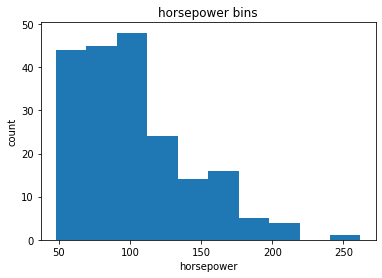

In [241]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Nos gustaría 3 bins de ancho de banda de igual tamaño, por lo que utilizamos el espacio de lins de numpy (start_value, end_value, numbers_generated).

Como queremos incluir el valor mínimo de caballos de fuerza, queremos establecer `start_value = min (df ["caballos de fuerza"]).`

Como queremos incluir el valor máximo de caballos de fuerza, queremos establecer `end_value = max (df ["caballos de fuerza"]).`

Como estamos construyendo 3 contenedores de igual longitud, debería haber 4 divisores, por lo que `números_generados = 4.`

Construimos una matriz bin, con un valor mínimo a un valor máximo, con el ancho de banda calculado anteriormente. Los contenedores serán valores utilizados para determinar cuándo termina un contenedor y comienza otro.

In [242]:
bins = np.linspace (min(df["horsepower"]),max(df["horsepower"]),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Ponemos nombres a estos grupos de numeros

In [243]:
groups_names = ["Low","medium","hight"]

Aplicamos la función `cut` para determinar a qué pertenece cada valor de `"df ['caballos de fuerza']"`.

In [244]:
df["horsepower-binned"] = pd.cut(df["horsepower"],bins, labels=groups_names,include_lowest=True)
df[["horsepower",'horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,medium
9,101,Low


Veamos la cantidad de vehículos en cada contenedor. (los vehiculos de cada grupo creado)


In [245]:
df["horsepower-binned"].value_counts()

Low       153
medium     43
hight       5
Name: horsepower-binned, dtype: int64

Vamos a trazar la distribución de cada contenedor.

Text(0.5, 1.0, 'horsepower bins')

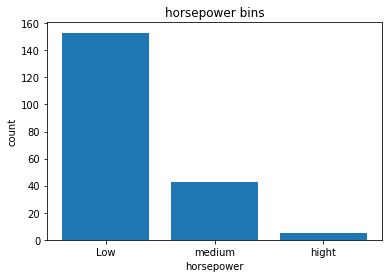

In [246]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(groups_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Verifique cuidadosamente el marco de datos anterior, encontrará que la última columna proporciona los contenedores para "caballos de fuerza" con 3 categorías ("Bajo", "Medio" y "Alto").

¡Hemos reducido con éxito los intervalos de 57 a 3!

In [247]:
### Visualización de contenedores

 Normalmente, se usa un histograma para visualizar la distribución de los contenedores que creamos anteriormente.

IndentationError: unexpected indent (<ipython-input-247-b235794bc31d>, line 3)

Text(0.5, 1.0, 'horsepower bins')

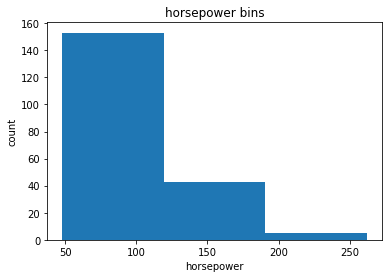

In [248]:
import matplotlib as plt
from matplotlib import pyplot

a = (1,2,3)

#Dibujar un histograma de atrubuto "horsepowe" con bins = 3
plt.pyplot.hist(df["horsepower"],bins=3)

#poner las etiquetas x/y para los titulos de los ejes
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title ("horsepower bins")

El gráfico anterior muestra el resultado de agrupación para el atributo "caballos de fuerza".

## Indicador variable (o variable ficticia)
#### ¿Qué es una variable indicadora?
Una variable indicadora (o variable ficticia) es una variable numérica utilizada para etiquetar categorías. Se llaman 'dummies' porque los números en sí mismos no tienen un significado inherente.

¿Por qué usamos variables indicadoras?

Entonces podemos usar variables categóricas para el análisis de regresión en los módulos posteriores.

####Ejemplo
Vemos que la columna "tipo de combustible" tiene dos valores únicos, "gas" o "diesel". La regresión no entiende palabras, solo números. Para usar este atributo en el análisis de regresión, convertimos "tipo de combustible" en variables indicadoras.

Utilizaremos el método de panda 'get_dummies' para asignar valores numéricos a diferentes categorías de tipo de combustible.

In [249]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

obtener variables indicadoras y asignarlas al marco de datos `dummy_variable_1`

In [250]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Cambiar los nombres de las columnas para mas claridad


In [251]:
dummy_variable_1.rename(columns={'fuel-type-diesel' : 'gas', 'fuel-type-diesel' : 'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Ahora tenemos el valor 0 para representar "gas" y 1 para representar "diesel" en la columna "tipo de combustible". Ahora volveremos a insertar esta columna en nuestro conjunto de datos original.

In [252]:

#Unir el marco de datos "df" y "dummy_variable_1"
df = pd.concat([df,dummy_variable_1],axis=1)

#Eliminar la columna original "fuel-type" del marco de datos "df"
df.drop("fuel-type",axis = 1, inplace = True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


Las dos últimas columnas son ahora la representación de la variable indicadora de la variable de tipo de combustible. Ahora son todos ceros y ceros.

In [253]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
# todos los valores std seran renombrados aspiration-std y con valor (0), tubo se llamará aspiration-turbo con #valor de (1)
dummy_variable_2.rename(columns={"std": "aspiration-std","turbo": "aspiration-turbo"},inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [254]:
#Unir el marco de datos "dummy_variable_2" al marco de datos que estamos trabajando "df"
df = pd.concat([df,dummy_variable_2],axis=1)

#Eliminar la columna original "aspiration" del dataframe "df"
df.drop('aspiration',axis = 1, inplace = True)

Guardamos los cambios en un archivo nuevo con extención csv

In [257]:
df.to_csv('clean_df.csv')